In [1]:
#必要なライブラリを読み込む
from matplotlib import pyplot as plt
from matplotlib import cm
#%matplotlib inline #スクリプト内に書くとエラーとなる

import numpy as np
from sklearn import datasets

#from sklearn import cross_validation 
from sklearn import model_selection # modify  2019.9.22
from sklearn import svm
from sklearn import metrics


In [6]:
def digits_svm(X,y):
    scores = []
    # K-fold 交差検証でアルゴリズムの汎化性能を調べる
    
    # modify  2019.9.22
    #kfold = cross_validation.KFold(len(X), n_folds=5)
    #for train, test in kfold(X):
    kfold = model_selection.KFold(n_splits=5)
    for train, test in kfold.split(X):
        # デフォルトのカーネルは rbf になっている
        model = svm.SVC(C=2**2, gamma=2**-11)
        # 訓練データで学習する
        model.fit(X[train], y[train])
        # テストデータの正答率を調べる
        score = metrics.accuracy_score(model.predict(X[test]), y[test])
        scores.append(score)

    # 最終的な正答率を出す
    accuracy = (sum(scores) / len(scores)) * 100
    msg = '正答率: {accuracy:.2f}%'.format(accuracy=accuracy)
    print(msg)
    

NameError: name 'scores' is not defined

NameError: name 'scores' is not defined

In [3]:
def main():
    digits = datasets.load_digits()
    X = digits.data
    y = digits.target

    print('データセットの点数: {N}'.format(N=X.shape[0]))
    print('各データの次元数: {dimension}'.format(dimension=X.shape[1]))

    # データの中から 25 点を無作為に選び出す
    #p = np.random.random_integers(0, len(X), 25)
    p = np.random.randint(0, len(X), 25)

    # 選んだデータとラベルを matplotlib で表示する
    samples = np.array(list(zip(X, y)))[p]
    for index, (data, label) in enumerate(samples):
        # 画像データを 5x5 の格子状に配置する
        plt.subplot(5, 5, index + 1)
        # 軸に関する表示はいらない
        plt.axis('off')
        # データを 8x8 のグレースケール画像として表示する
        plt.imshow(data.reshape(8, 8), cmap=cm.gray_r, interpolation='nearest')
        # 画像データのタイトルに正解ラベルを表示する
        plt.title(label, color='red')

    # グラフを表示する
    plt.show()
    
    # svmで分類する
    digits_svm(X,y)

データセットの点数: 1797
各データの次元数: 64


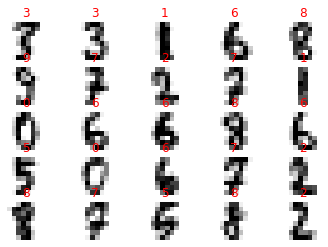

正答率: 97.44%


In [4]:
if __name__ == '__main__':
    main()